# Main File

TODO:
FEATURES    
IMPORTANCEhttps://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py


and InductiveClustering  https://scikit-learn.org/stable/auto_examples/cluster/plot_inductive_clustering.html#sphx-glr-auto-examples-cluster-plot-inductive-clustering-py

To sort file, increment by 1 the 2nd character.<br>If need to add an intermediate step: une the bisector (forward or backward) on the 3th character ( eg: forward M -> G , backward M->T)  <br> A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [1]:
#!pip install imgkit

In [2]:
%load_ext autoreload
%aimport functions
%autoreload 2

In [3]:
from pathlib import Path
from IPython.display import display, HTML
import joblib
import numpy as np
import pandas as pd
import geopandas as gpd

In [4]:
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
sns.set_theme(style="whitegrid", palette="Set2")

In [6]:
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin, clone

from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA, KernelPCA, FactorAnalysis
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)

from sklearn import metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, StratifiedGroupKFold, GroupShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import  Lasso, LassoLarsIC, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector

from sklearn.metrics import homogeneity_score, make_scorer

In [7]:
from functions import KMeansTransformer

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

The process 'preprocess_01MM' take a lot of time therefore it is better to run it once.  
The result is saved in a file for later used.

## preprocess_01MM : Limites Administratives

In [9]:
# %run ./preprocess_01MM.ipynb

## preprocess_02MM : Arrondissements

(186, 5)


/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


,IdenfiantSecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement
0,4,RDP-91,17,RDP,R.D.P. / P.A.T.
1,4,RDP-91,17,RDP,R.D.P. / P.A.T.
2,5,RDP-92,17,RDP,R.D.P. / P.A.T.


(34, 9)


,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry
0,34,Anjou,REM09,9,AJ,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ..."
1,33,Pointe-Claire,66097,8,PC,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((-73.76847 45.41859, -73.77866 ..."
2,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ..."


,ArrondissementCode,Arrondissement
0,RDP,R.D.P. / P.A.T.
19,VMA,Ville-Marie
24,S-O,Sud-Ouest
27,PMR,Plateau Mont-Royal
34,AHU,Ahuntsic / Cartierville
55,RPP,Rosemont / Petite-Patrie
74,VSP,Villeray / St-Michel / Parc-Extension
82,CDN,Côte-des-Neiges / Notre-Dame-de-Grâce
89,MHM,Mercier / Hochelaga / Maisonneuve
99,ANJ,Anjou


   ArrondissementCode ABREV
0                 RDP    RP
1                 VMA    VM
2                 S-O    SO
3                 PMR    PM
4                 AHU    AC
5                 RPP    RO
6                 VSP    VS
7                 CDN    CN
8                 MHM    MH
9                 ANJ    AJ
10                LAC    LC
11                LAS    LS
12                MTN    MN
13                OUT    OM
14                PRF    PR
15                SLA    LR
16                SLE    LN
17                VER    VD
18                IBI    IS
19                WES    WM
Index(['CODEID', 'NOM', 'CODEMAMH', 'NUM', 'ABREV', 'TYPE', 'COMMENT',
       'DATEMODIF', 'geometry', 'ArrondissementCode'],
      dtype='object')
(20, 10) (34, 38) (20, 49)


,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry,ArrondissementCode,index,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,streets_per_node_counts_0,streets_per_node_counts_1,streets_per_node_counts_2,streets_per_node_counts_3,streets_per_node_counts_4,streets_per_node_counts_5,streets_per_node_proportions_0,streets_per_node_proportions_1,streets_per_node_proportions_2,streets_per_node_proportions_3,streets_per_node_proportions_4,streets_per_node_proportions_5,streets_per_node_counts_6,streets_per_node_proportions_6,streets_per_node_counts_7,streets_per_node_proportions_7,streets_per_node_counts_8,streets_per_node_proportions_8,streets_per_node_counts_9,streets_per_node_proportions_9,streets_per_node_counts_10,streets_per_node_counts_11,streets_per_node_counts_12,streets_per_node_proportions_10,streets_per_node_proportions_11,streets_per_node_proportions_12
0,34,Anjou,REM09,9,AJ,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ...",ANJ,AJ,3119,8532,5.470984,461789.932,54.124465,3.094902,2822,277921.879,4776,58.191348,1.065034,0.002513,0,297,9,1930,867,16.0,0.0,0.095223,0.002886,0.618788,0.277974,0.005130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ...",RPP,RO,6139,17057,5.556931,865298.849,50.729838,3.241082,5688,514283.343,9812,52.413712,1.039422,0.001529,0,451,14,3337,2282,51.0,0.0,0.073465,0.002281,0.543574,0.371722,0.008308,4.0,0.000652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22,Westmount,66032,4,WM,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((-73.59513 45.47645, -73.59469 ...",WES,WM,700,1933,5.522857,138408.943,71.603178,3.078571,633,76323.820,1046,72.967323,1.043247,0.000956,0,67,0,452,173,8.0,0.0,0.095714,0.000000,0.645714,0.247143,0.011429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,Mercier-Hochelaga-Maisonneuve,REM22,23,MH,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.56970 45.59660, -73.56947 ...",MHM,MH,6993,19688,5.630774,1056255.121,53.649691,3.232375,6403,626557.474,11231,55.788218,1.044986,0.002226,0,590,18,3623,2705,54.0,0.0,0.084370,0.002574,0.518090,0.386815,0.007722,2.0,0.000286,1.0,0.000143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,Le Sud-Ouest,REM20,21,SO,Arrondissement,Il est important de noter que la limite située...,2022-08-24,"MULTIPOLYGON (((-73.63530 45.45078, -73.63524 ...",S-O,SO,6375,18374,5.764392,876606.010,47.709046,3.242510,5876,513561.389,10220,50.250625,1.039018,0.001174,0,499,17,3373,2423,53.0,0.0,0.078275,0.002667,0.529098,0.380078,0.008314,8.0,0.001255,2.0,0.000314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/ml/k9khjmr57qqcw3y03b7k154c0000gn/T/ipykernel_76732/867976642.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  adm_feat.to_latex(filename)


(20, 49) (186, 5) (186, 53)


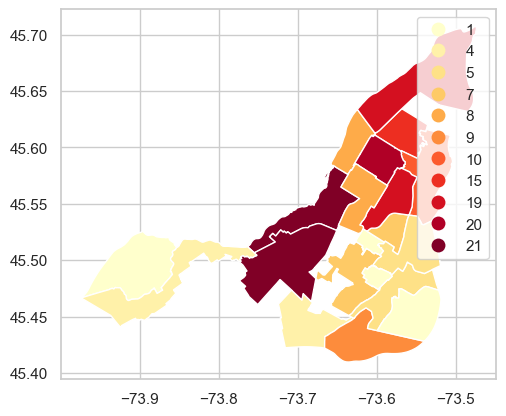

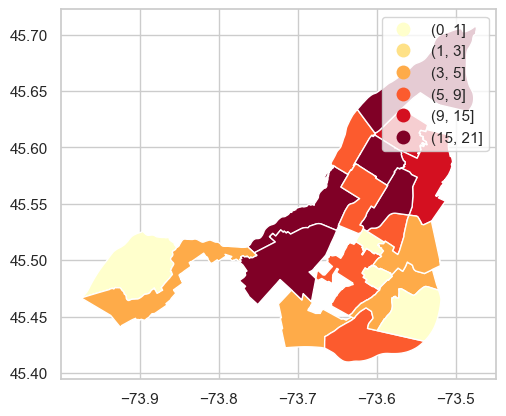

,secteur_count,binned,area
ArrondissementCode,,,
AHU,21,"(15, 21]",5.214740e+07
SLA,21,"(15, 21]",8.764706e+07
SLE,20,"(15, 21]",2.759526e+07
RDP,19,"(15, 21]",1.049463e+08
RPP,19,"(15, 21]",3.239825e+07
ANJ,15,"(9, 15]",2.839600e+07
MHM,10,"(9, 15]",5.594018e+07
LAS,9,"(5, 9]",5.118610e+07
VSP,8,"(5, 9]",3.361519e+07


THE END of preprocess 02MM


/var/folders/ml/k9khjmr57qqcw3y03b7k154c0000gn/T/ipykernel_76732/273021942.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  frame.to_latex(filename)


In [11]:
%run ./preprocess_02MM.ipynb

In [12]:
adm_features.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   CODEID                           20 non-null     int64   
 1   NOM                              20 non-null     object  
 2   CODEMAMH                         20 non-null     object  
 3   NUM                              20 non-null     int64   
 4   ABREV                            20 non-null     object  
 5   TYPE                             20 non-null     object  
 6   COMMENT                          2 non-null      object  
 7   DATEMODIF                        20 non-null     object  
 8   geometry                         20 non-null     geometry
 9   ArrondissementCode               20 non-null     object  
 10  index                            20 non-null     object  
 11  n                                20 non-null     int64   
 12  m 

In [13]:
#adm_secteur.info() # Not neede yet

## Preprocess_03MM : Weekly Snowfall 

In [16]:
#%run ./weekly_snowfall_v2.ipynb

In [17]:
#output_volume_series_labels = joblib.load(Path('..','data','generated','descriptive_data.joblib'))


In [31]:
dtw2 = joblib.load(Path('..','data','generated','arrond_label.joblib'))


In [60]:
adm_features2 =  adm_features.copy()

In [61]:
numeric_cols = [col for col in adm_features2 if pd.api.types.is_numeric_dtype(adm_features2[col])]
print(numeric_cols)
for n in numeric_cols:
    adm_features2[n] = adm_features2[n].div(adm_features2['area'], axis=0)

adm_features2 = adm_features2.merge(dtw2[[ 'mode_0']], on='ArrondissementCode')

['CODEID', 'NUM', 'n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg', 'streets_per_node_avg', 'intersection_count', 'street_length_total', 'street_segment_count', 'street_length_avg', 'circuity_avg', 'self_loop_proportion', 'streets_per_node_counts_0', 'streets_per_node_counts_1', 'streets_per_node_counts_2', 'streets_per_node_counts_3', 'streets_per_node_counts_4', 'streets_per_node_counts_5', 'streets_per_node_proportions_0', 'streets_per_node_proportions_1', 'streets_per_node_proportions_2', 'streets_per_node_proportions_3', 'streets_per_node_proportions_4', 'streets_per_node_proportions_5', 'streets_per_node_counts_6', 'streets_per_node_proportions_6', 'streets_per_node_counts_7', 'streets_per_node_proportions_7', 'streets_per_node_counts_8', 'streets_per_node_proportions_8', 'streets_per_node_counts_9', 'streets_per_node_proportions_9', 'streets_per_node_counts_10', 'streets_per_node_counts_11', 'streets_per_node_counts_12', 'streets_per_node_proportions_10', 'streets_per_n

In [62]:
adm_features2.columns

Index(['CODEID', 'NOM', 'CODEMAMH', 'NUM', 'ABREV', 'TYPE', 'COMMENT',
       'DATEMODIF', 'geometry', 'ArrondissementCode', 'index', 'n', 'm',
       'k_avg', 'edge_length_total', 'edge_length_avg', 'streets_per_node_avg',
       'intersection_count', 'street_length_total', 'street_segment_count',
       'street_length_avg', 'circuity_avg', 'self_loop_proportion',
       'streets_per_node_counts_0', 'streets_per_node_counts_1',
       'streets_per_node_counts_2', 'streets_per_node_counts_3',
       'streets_per_node_counts_4', 'streets_per_node_counts_5',
       'streets_per_node_proportions_0', 'streets_per_node_proportions_1',
       'streets_per_node_proportions_2', 'streets_per_node_proportions_3',
       'streets_per_node_proportions_4', 'streets_per_node_proportions_5',
       'streets_per_node_counts_6', 'streets_per_node_proportions_6',
       'streets_per_node_counts_7', 'streets_per_node_proportions_7',
       'streets_per_node_counts_8', 'streets_per_node_proportions_8',
  

## PIPELINE

In [63]:
# view : https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html
from sklearn import set_config, config_context
#set_config(transform_output="pandas")

In [74]:
#X_train, X_test, rest_train, rest_test = train_test_split(X, rest, test_size=0.30, random_state=42
#                                                    , stratify=gdf[y_cluster[0]])

y_train = adm_features['ArrondissementCode']
y_train = adm_features['NOM']
y_train = adm_features2['mode_0']


X_train = adm_features2.copy()
X_train = X_train.drop(columns=['geometry','index','NOM','CODEID','CODEMAMH','NUM','ABREV','DATEMODIF','ArrondissementCode', 'mode_0'])
#X_train= X_train.droplevel(0)
#print(X_train.columns)

In [121]:
def projectTSNE(X,n_components=2, random_state=0,  perplexity=None ):
    e = TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity )
    return e.fit_transform(X)


class Model(Pipeline):
   
   #def __init__(self):
    #super(Model, self).__init__()


    def labels(self):
        #return self['estimator']['clusterer'].labels_
        return self['estimator'].clusterer.labels_
        #return self[:-1].labels_

    def project(self, n_components=2, random_state=0,  perplexity=None):
         return projectTSNE(self['transformer'].X_transformed_fit_,n_components=n_components, 
                            random_state=random_state,perplexity=perplexity)
        
    def plot_pipeline(self,filename, df):
        from mlinsights.plotting import pipeline2dot
        from pyquickhelper.loghelper import run_cmd
        dot = pipeline2dot(self, df)
        with open(filename, "w", encoding="utf-8") as f:
            f.write(dot)
        cmd = "dot -G=300 -Tpng {0} -o{0}.png".format(filename)
        run_cmd(cmd, wait=True, fLOG=print);


    def classes_(self):
        """The classes labels. Only exist if the last step is a classifier."""
        return self.steps[-1][0].classes_


    def transform(self, X):
        return self[-1].transform(X)

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)  


def build_pipeline(estimator, transformer, scaling=True, transformer_weights=None, memory=None):
    """ Build a robust pipeline with the given estimator model
    Keyword arguments:
    scaling -- whether or not to scale the data
    
    Returns: a pipeline
    """
    cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                             OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    num_pipe = make_pipeline(SimpleImputer(strategy='median'))
    
    numerical = make_column_selector(dtype_include=np.number)
    #categorical = make_column_selector(dtype_include=object)
    categorical = make_column_selector(dtype_exclude=np.number)    
    
    if scaling:
        num_pipe.steps.insert(1,["scaler", MinMaxScaler()]) 
        
    if estimator.__class__.__name__ == 'MeanShift':
        # The following bandwidth can be automatically detected using
        bandwidth = estimate_bandwidth(quantile=0.2, n_samples=500)
        estimator.set_params('bandwidth',bandwidth)

    preprocess = ColumnTransformer([('cat',cat_pipe, categorical),
                                    ('num',num_pipe,numerical)],
                                   remainder="drop",#"passthrough",
                                  transformer_weights=transformer_weights)
     
    # Give a name to the estimator and last transformer so that we can tune it more easily
    return Model(steps=[('preprocess', preprocess), ('transformer',transformer)
                           , #('estimator', estimator)
                           ]
                   , memory= memory
                   )

    #preprocess = make_column_transformer((cat_pipe, categorical),(num_pipe,numerical), remainder="passthrough")    
    #combined = FeatureUnion(estimators)

In [122]:
%reload_ext functions
import functions
from sklearn.tree import DecisionTreeClassifier

In [123]:


# Create a temporary folder to store the transformers of the pipeline
location = "cachedir"
memory = Memory(location=location, verbose=10)

In [124]:
# TODO: adjust: transformer_weights between geo* and *time*
n_neighbors = 8
transformer_1 =  KernelPCA(n_components=2, kernel="rbf", gamma=10, alpha=0.1,
                         fit_inverse_transform=True)

from sklearn.feature_selection import SelectFromModel


#estimator = functions.InductiveClusterer(clusterer=KMeans(n_clusters=5, n_init='auto'), classifier=RandomForestClassifier(n_estimators=80))
estimator = DecisionTreeClassifier(random_state=42)

transformer_1 =  SelectFromModel(estimator, prefit=True)

transformer = make_pipeline(transformer_1)

filename = Path('..','media','pipeline_clustering')

model = build_pipeline(estimator=estimator, transformer= transformer, scaling=True, memory=memory)
#model.feature_names_in = X_train.columns.to_list()
#model.set_output(transform='pandas')

display(model)

#Looking up parameters that can be passed to the pipeline
print(model.get_params().keys())

Model(memory=Memory(location=cachedir/joblib),
      steps=[('preprocess',
              ColumnTransformer(transformers=[('cat',
                                               Pipeline(steps=[('simpleimputer',
                                                                SimpleImputer(strategy='most_frequent')),
                                                               ('onehotencoder',
                                                                OneHotEncoder(handle_unknown='ignore',
                                                                              sparse_output=False))]),
                                               <sklearn.compose._column_transformer.make_column_selector object at 0x29385a9d0>),
                                              ('num',
                                               Pipeline(steps=[('simpleimputer',
                                                                SimpleImputer(strategy='median')),
                                                               ['scaler',
                                                                MinMaxScaler()]]),
                                               <sklearn.compose._column_transformer.make_column_selector object at 0x2936c6940>)])),
             ('transformer',
              Pipeline(steps=[('selectfrommodel',
                               SelectFromModel(estimator=DecisionTreeClassifier(random_state=42),
                                               prefit=True))]))])

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'transformer', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__verbose_feature_names_out', 'preprocess__cat', 'preprocess__num', 'preprocess__cat__memory', 'preprocess__cat__steps', 'preprocess__cat__verbose', 'preprocess__cat__simpleimputer', 'preprocess__cat__onehotencoder', 'preprocess__cat__simpleimputer__add_indicator', 'preprocess__cat__simpleimputer__copy', 'preprocess__cat__simpleimputer__fill_value', 'preprocess__cat__simpleimputer__keep_empty_features', 'preprocess__cat__simpleimputer__missing_values', 'preprocess__cat__simpleimputer__strategy', 'preprocess__cat__simpleimputer__verbose', 'preprocess__cat__onehotencoder__categories', 'preprocess__cat__onehotencoder__drop', 'preprocess__cat__onehotencoder__dtype', 'preprocess__cat__onehotencoder__handle_unknown', 'preprocess__cat__onehotencoder__

In [128]:
from sklearn.datasets import make_blobs

def my_silhouette_score(estimator, X, y=None):
    labels = estimator.predict(X)
    #labels = estimator.fit_predict(X)
    print(labels)
    try:
        score = sklearn.metrics.silhouette_score(X, labels, metric='euclidean')
        # score = sklearn.metrics.calinski_harabasz_score(X, labels)
    except ValueError:
        score = -1  # float('nan')
    return score    


#scorer = make_scorer(my_silhouette_score)


pgrid = {
    #'transformer__kmeanstransformer__n_clusters': np.arange(2, 5),
    'transformer__kernelpca__n_components': np.arange(2, 4),
    'transformer__kernelpca__gamma':np.arange(2, 10),
    #'transformer__kernelpca__alpha':[0.1, 0.2]
    #'estimator__clusterer__n_clusters': np.arange(3,6)
}

# cv=[(slice(None), slice(None))]to get rid from the  cross validation
cv=[(slice(None), slice(None))]
                       
gs = GridSearchCV(model, pgrid, 
                  #scoring=scorer,
                  scoring='accuracy',
                    cv=cv,
                  #refit='my_silhouette_score',
                  error_score=-1)


data, labels = sklearn.datasets.make_classification(n_samples=32, n_features=23, n_classes=5, n_clusters_per_class=2, 
                                                    n_informative=10, n_redundant=2, n_repeated=0)



#XX = pd.DataFrame(data)
#print(XX)
#gs.fit(XX, labels)

XX = X_train
labels  = y_train
gs.fit(XX, labels)

#gs.fit(XX)
print(gs.best_params_)
best_estimator = gs.best_estimator_
print(best_estimator)
#highest_silhouette_score = gs.score(X_train)
#print(highest_silhouette_score)

y_pred = gs.predict(XX)

ValueError: Invalid parameter 'kernelpca' for estimator Pipeline(steps=[('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=42),
                                 prefit=True))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [126]:
print(labels.values)
print(y_pred)

['Carierre' 'Entassement' 'Carierre' 'Chute_Egout' 'Carierre' 'Carierre'
 'Chute_Egout' 'Chute_Egout' 'Carierre' 'Chute_Egout' 'Chute_Egout'
 'Chute_Egout' 'Entassement' 'Carierre' 'Entassement' 'Entassement'
 'Entassement' 'Chute_Egout' 'Chute_Egout']
['Carierre' 'Entassement' 'Carierre' 'Chute_Egout' 'Carierre' 'Carierre'
 'Chute_Egout' 'Chute_Egout' 'Carierre' 'Chute_Egout' 'Chute_Egout'
 'Chute_Egout' 'Entassement' 'Carierre' 'Entassement' 'Entassement'
 'Entassement' 'Chute_Egout' 'Chute_Egout']


AttributeError: 'Model' object has no attribute 'tree_'

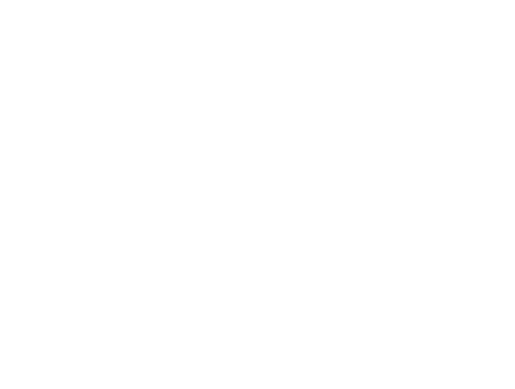

In [110]:
from sklearn import tree
from sklearn.metrics import classification_report
#tree.plot_tree(gs.best_estimator_)
#plt.show()

[Text(0.5416666666666666, 0.9, 'x[1] <= -0.085\ngini = 0.654\nsamples = 19\nvalue = [6, 8, 5]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= -0.091\ngini = 0.469\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= -0.101\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.5, 'x[0] <= -0.08\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.75, 0.7, 'x[0] <= -0.08\ngini = 0.595\nsamples = 11\nvalue = [6, 3, 2]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.8333333333333334, 0.5, 'x[0] <= 0.303\ngini = 0.611\nsamples = 6\nvalue = [1, 3, 2]'),
 Text(0.75, 0.3, 'x[1] <= -0.084\ngini = 0.625\nsamples = 4\nvalue = [1, 1, 2

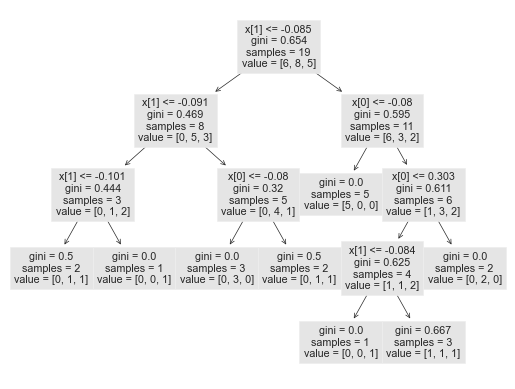

In [111]:
tree.plot_tree(estimator)

In [106]:
#type_depot = dtw2['TypeDepot'].unique()
print(classification_report(labels, y_pred, target_names=['Entassement', 'Carierre', 'Chute_Egout']))

#vars(gs)
#print(gs.best_params_)
#result = pd.DataFrame(gs.cv_results_)
#display(result)
#result['mean_test_score'].plot()

              precision    recall  f1-score   support

 Entassement       1.00      1.00      1.00         6
    Carierre       1.00      1.00      1.00         8
 Chute_Egout       1.00      1.00      1.00         5

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



#print(model.get_params('composite__visualizer__perplexity'))
 Test 1 : NO position = StandardScaler().fit_transform(position)
 Test 2: Still on the top of each other
n_neighbors = 2
man = SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
position = man.fit_transform(position)
man = Isomap(n_neighbors=n_neighbors, n_components=2)
position = man.fit_transform(position)

In [95]:
#vars(gs)
#model.fit(X_train)
model.fit(XX,labels)
print(model[:-1].get_feature_names_out() )

#model[-2].X_transformed_fit_
YY = model[:-2].fit_transform(XX)
print(YY)
#X_Transf = transformer_1.X_transformed_fit_

X_Transf = YY

print(X_Transf)






[Memory]363.3s, 6.1min  : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/6f0ea431970a29e8f0ee9eed1e70f706
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(Pipeline(steps=[('kernelpca',
                 KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=10,
                           kernel='rbf', n_components=2))]), 
array([[1., ..., 0.],
       ...,
       [1., ..., 0.]]), 0        Carierre
1     Entassement
2        Carierre
3     Chute_Egout
4        Carierre
5        Carierre
6     Chute_Egout
7     Chute_Egout
8        Carierre
9     Chute_Egout
10    Chute_Egout
11    Chute_Egout
12    Entassement
13       Carierre
14    Entassement
15    Entassement
16    Entassement
17    Chute_Egout
18    Chute_Egout
Name: mode_0, dtype: object, 
None, message_clsname=

In [ ]:
#gs.get_params.clusterer.labels_
gs.classes_

In [ ]:
#gs.fit(X_train)

#proj = model.project(n_components=2, perplexity=n_neighbors)
#X_Transf = gs.transformer__kernelpca__X_transformed_fit_

#X_Transf = transformer_1.X_transformed_fit_
#X_Transf = transformer_1.fit_transform(X_train)

Xor = X_Transf

proj = projectTSNE(Xor,n_components=2, random_state=0,  perplexity=n_neighbors )

with config_context(transform_output="pandas"):
    #reduced_data = model.transform(X_train)
    #reduced_data = model.fit_transform(XX, labels)
    reduced_data = XX
#    #display(reduced_data.head())    


#reduced_data = model[-2].transform(X_train)
#reduced_data = model[-2].fit_transform(X_train)

#labels = model.labels()
labels = y_pred

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

reduced_data['group'] = labels
reduced_data['Arrondissement'] = y_train
reduced_data['area'] = adm_features['area']
reduced_data['manifold0'] = proj[:,0]
reduced_data['manifold1'] = proj[:,1]


sort = reduced_data.sort_values("group", ascending=False)
display(sort)


filename = Path('..','media','clustering_redu'+str(n_clusters_)+'.png')

#sns.set(style="darkgrid")
sns.set_theme(style="whitegrid", palette="Set1")

fig, ax = plt.subplots(figsize=(10,10))
g = sns.scatterplot(
#g = sns.regplot(    
    data=reduced_data,
    x="manifold0", y="manifold1",
    hue="group", style="group",
    #size="area",
    s=300,
    palette="Set2")

#ax.set(xscale="log", yscale="log")

for i,d in reduced_data.T.items():
    plt.text(d['manifold0'],d['manifold1'],d['Arrondissement'], horizontalalignment='left', size='small', color='black')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.show()

fig.savefig(filename)  

In [ ]:

# Delete the temporary cache before exiting
memory.clear(warn=False)
rmtree(location)

https://scikit-learn.org/stable/auto_examples/cluster/plot_inductive_clustering.html#sphx-glr-auto-examples-cluster-plot-inductive-clustering-py  
Clustering then Classification    

# COULD  USE SECTORS instead of ARRONDISSEMENTS IN ORDER TO INCREASE THE NUMBER OF SAMPLES



# ALSO HOW TO IMPROVE https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
